# CAR PRICE PREDICTION

In [94]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read data
data=pd.read_csv('data_car.csv')

In [4]:
#Display the first 5 rows
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Exploratory Data Analysis

In [11]:
df=data.copy()


In [12]:
df.shape

(11914, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [14]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [15]:
df['Make'].nunique()

48

In [18]:
df['Make'].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

In [19]:
df['Model'].value_counts()

Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
                     ... 
MKZ Hybrid              1
M4 GTS                  1
LFA                     1
Horizon                 1
Zephyr                  1
Name: Model, Length: 915, dtype: int64

In [21]:
df['Model'].nunique()

915

In [22]:
df['Engine Fuel Type'].nunique()

10

In [62]:
df['Engine Cylinders'].value_counts()

4.0     4362
6.0     4291
8.0     1965
12.0     228
5.0      169
10.0      65
0.0       56
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64

In [23]:
df['Transmission Type'].nunique()

5

In [25]:
df['Driven_Wheels'].nunique()

4

In [26]:
df['Market Category'].nunique()

71

In [27]:
df['Vehicle Size'].nunique()

3

In [28]:
df['Vehicle Style'].nunique()

16

In [29]:
df['Year'].max()

2017

In [30]:
df['Year'].min()

1990

In [31]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [33]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [34]:
# There are 3 null values in Engine Fuel Type,69 in Engine HP,30 in Engine Cylinders,6 in number of doors,3742 in market category

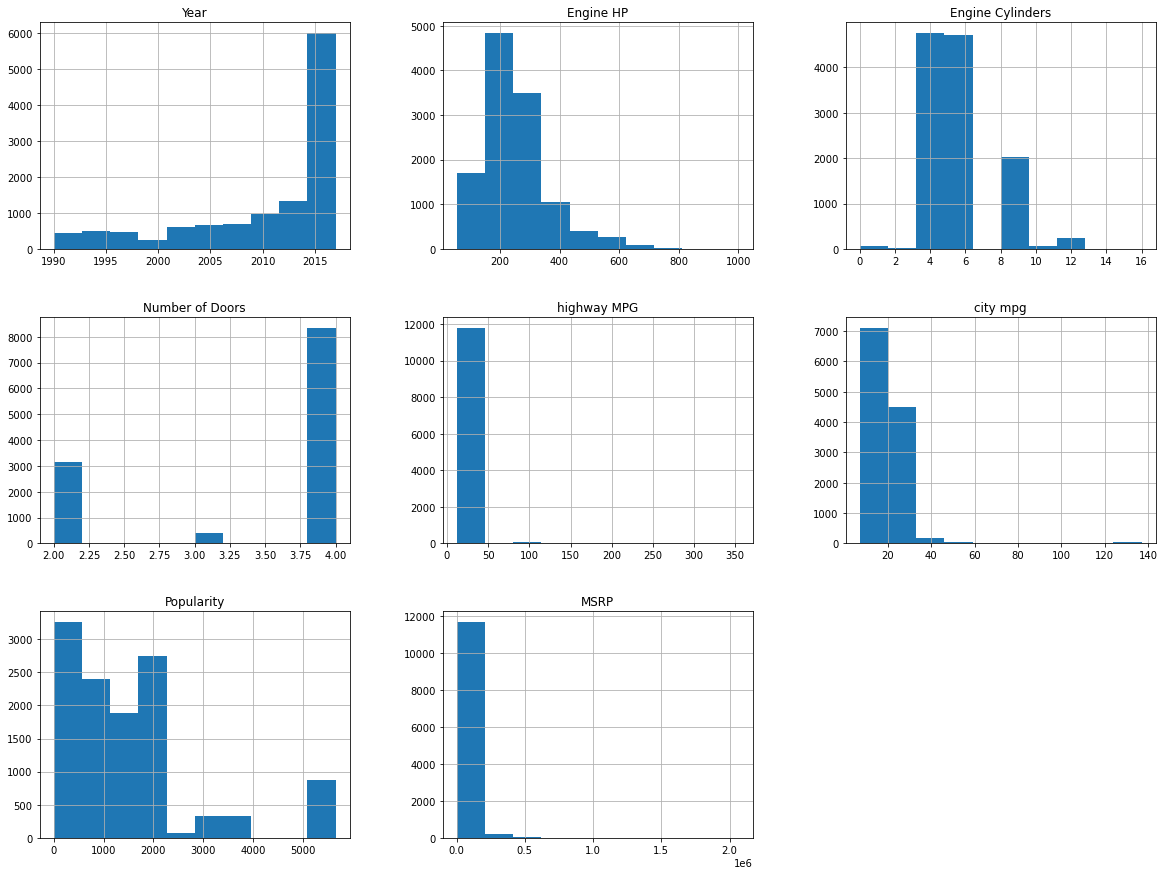

In [35]:
## Plot the distribution to decide if to take mean or median for filling the missing values
freqgraph=df.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

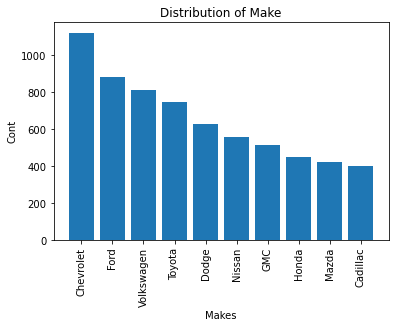

In [36]:
# plot count plot for the top 10 genre column
Make_count=df['Make'].value_counts()
top_10_makes=Make_count.head(10)
plt.bar(top_10_makes.index,top_10_makes.values)
plt.xticks(rotation=90)
plt.xlabel('Makes')
plt.ylabel('Cont')
plt.title('Distribution of Make')
plt.show()

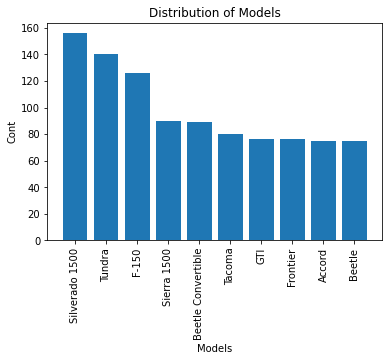

In [38]:
model_count=df['Model'].value_counts()
top_10_models=model_count.head(10)
plt.bar(top_10_models.index,top_10_models.values)
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('Cont')
plt.title('Distribution of Models')
plt.show()

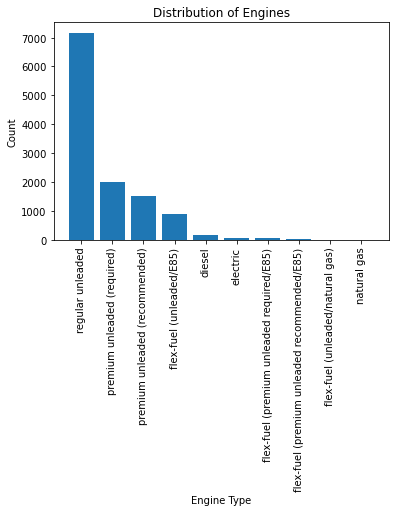

In [39]:
E_count=df['Engine Fuel Type'].value_counts()
top_10_eng=E_count.head(10)
plt.bar(top_10_eng.index,top_10_eng.values)
plt.xticks(rotation=90)
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.title('Distribution of Engines')
plt.show()

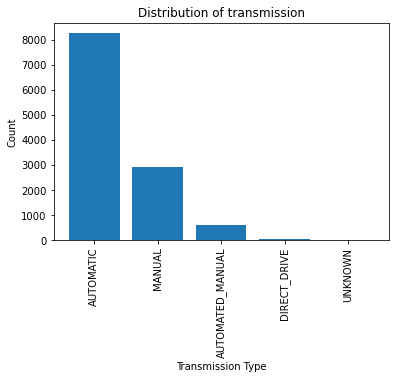

In [40]:
T_count=df['Transmission Type'].value_counts()
top_10_T=T_count.head(10)
plt.bar(top_10_T.index,top_10_T.values)
plt.xticks(rotation=90)
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Distribution of transmission')
plt.show()

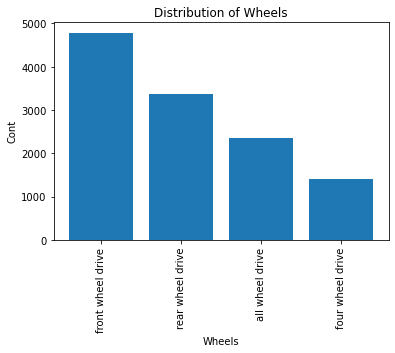

In [42]:
D_count=df['Driven_Wheels'].value_counts()
top_10_D=D_count.head(10)
plt.bar(top_10_D.index,top_10_D.values)
plt.xticks(rotation=90)
plt.xlabel('Wheels')
plt.ylabel('Cont')
plt.title('Distribution of Wheels')
plt.show()

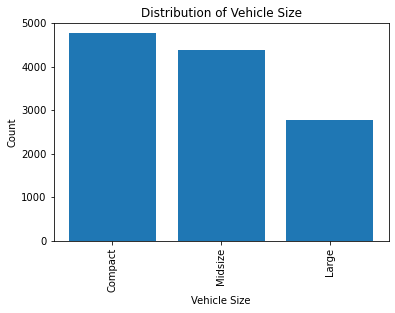

In [44]:
V_count=df['Vehicle Size'].value_counts()
top_10_V=V_count.head(10)
plt.bar(top_10_V.index,top_10_V.values)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Size')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Size')
plt.show()

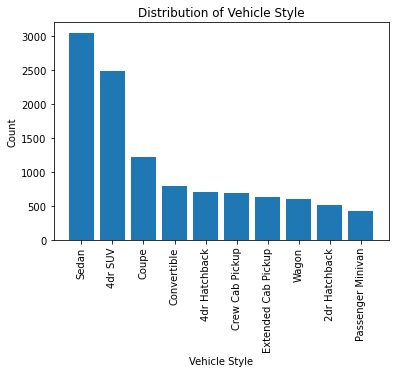

In [45]:
VS_count=df['Vehicle Style'].value_counts()
top_10_VS=VS_count.head(10)
plt.bar(top_10_VS.index,top_10_VS.values)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Style')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Style')
plt.show()

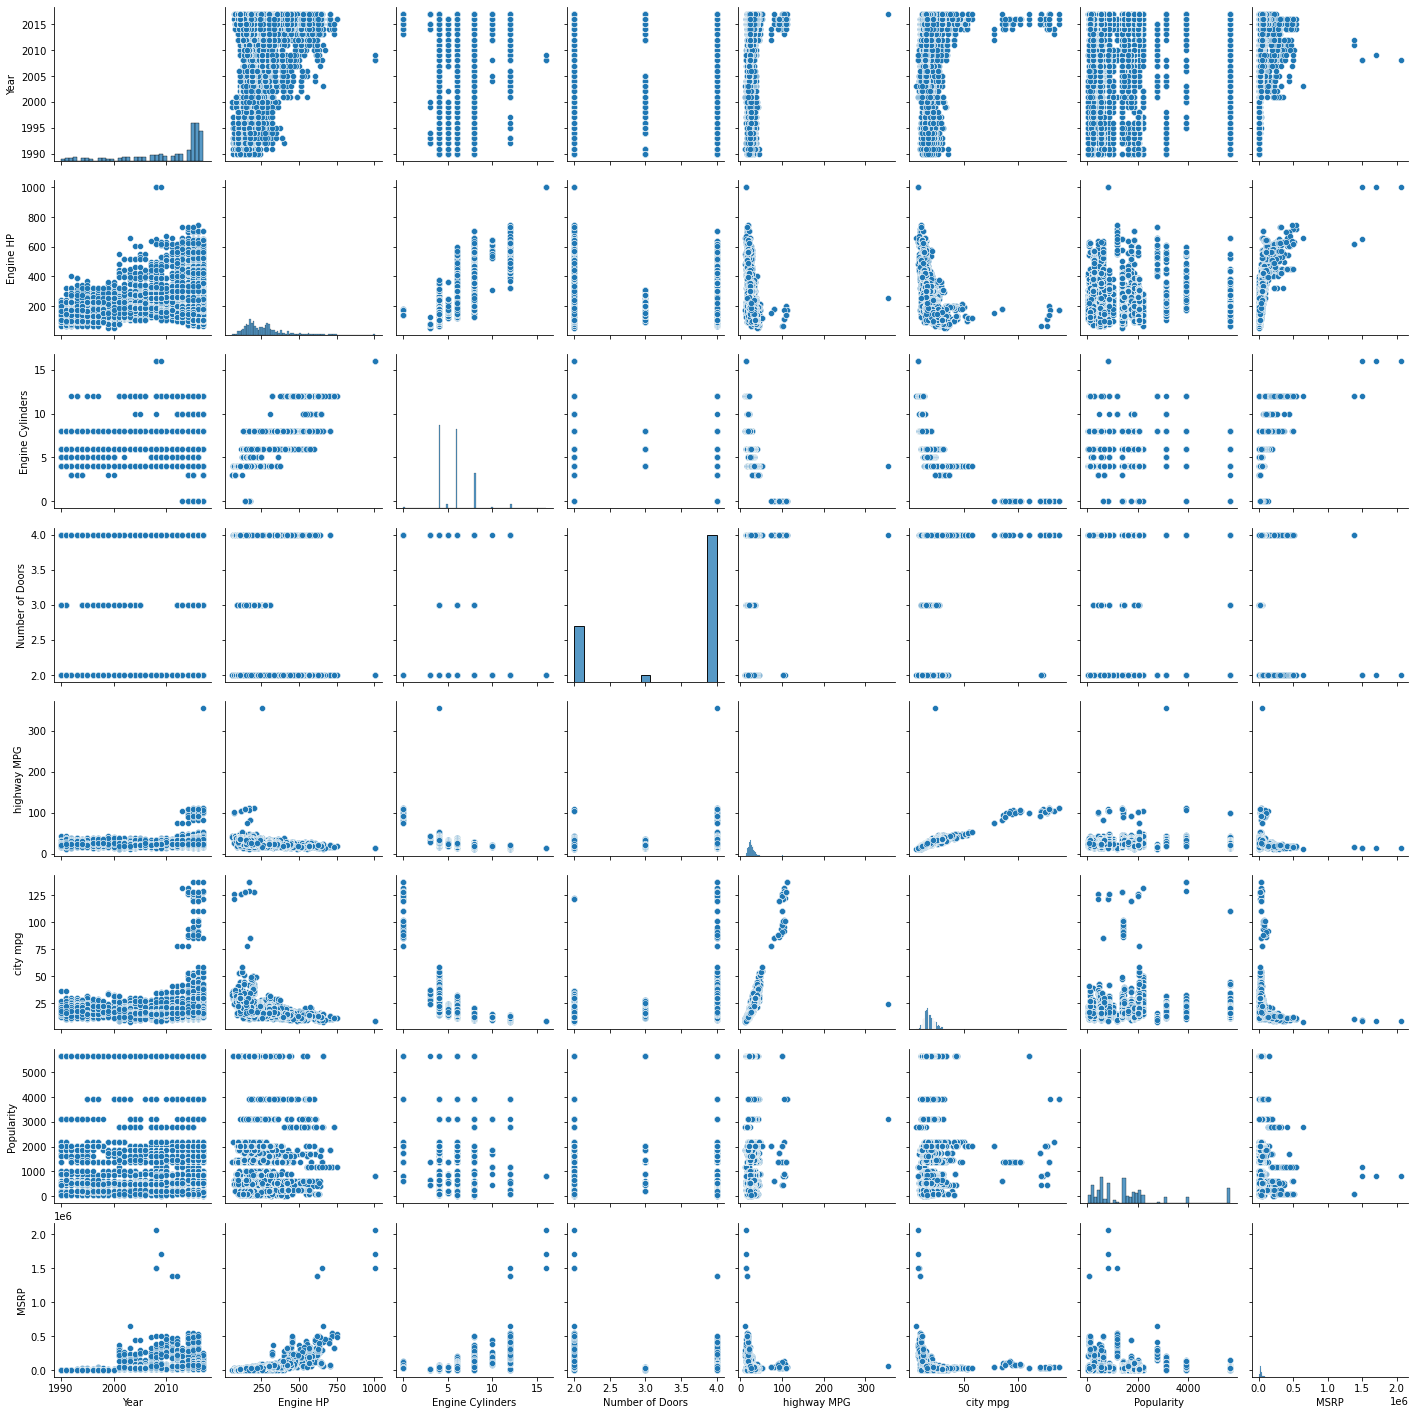

In [48]:
# Specify the columns to include in the pair plot
columns_to_plot = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors','highway MPG','city mpg','Popularity','MSRP']
data_subset = df[columns_to_plot]
# Create the pair plot
sns.pairplot(data_subset)

## DATA PREPROCESSING

### DATA CLEANING

#### Handling Duplicate Values

In [54]:
# find and drop duplicates
print(df.duplicated().sum())

715


In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.shape

(11199, 16)

In [59]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

#### Handling Missing Values

In [60]:
# Engine Fuel Type has 3 missing values. Since it is a categorical column fill with the mode value
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode().iloc[0])


In [61]:
# Fill null values of Engine HP with mean values
df['Engine HP']=df['Engine HP'].fillna(df['Engine HP'].mean())


In [65]:
df['Engine Cylinders']=df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())

In [74]:
df['Market Category']=df['Market Category'].fillna(df['Market Category'].mode().iloc[0])


In [75]:
df['Number of Doors']=df['Number of Doors'].fillna(df['Number of Doors'].median())


In [76]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

#### Zero Value Filling

In [78]:
#Engine Cylinder has some zero values.It will be replaced with the median value
for i in df.index:
    if df.loc[i,'Engine Cylinders']==0:
        df.loc[i,'Engine Cylinders']=df['Engine Cylinders'].median()

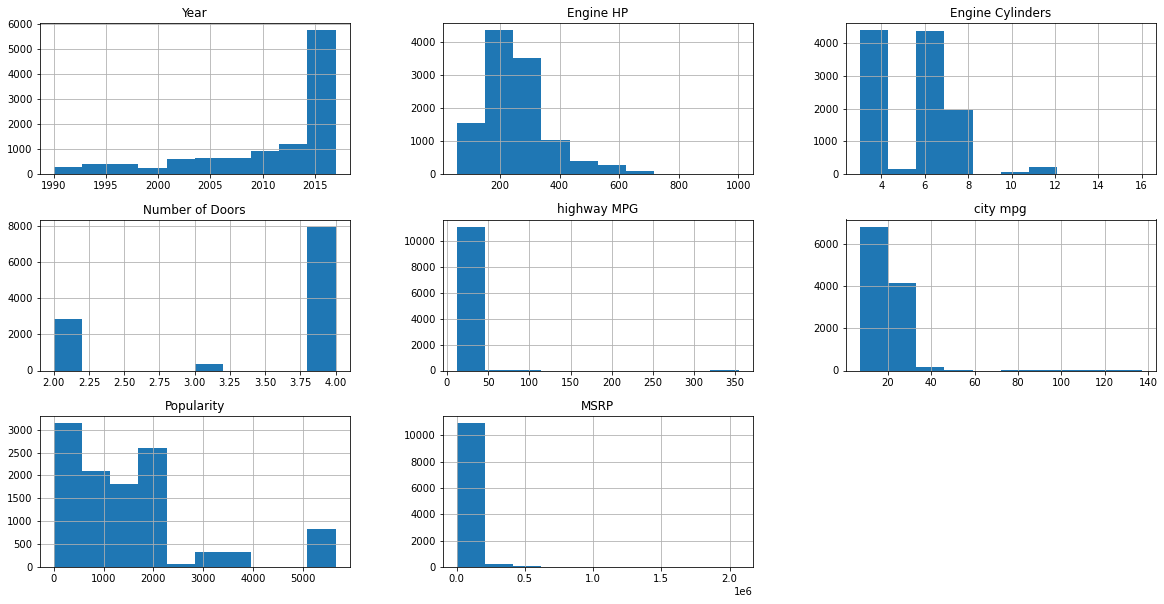

In [79]:
df.hist(figsize=(20,10))
plt.show()

### FEATURE ENGINEERING

In [81]:
# Market category has , seperated values-split these into different categories and taking only the first category
df['Market Category'] = df['Market Category'].str.split(',', expand=True)[0]

In [83]:
df['Market Category'].nunique()

10

In [84]:
df['Market Category'].value_counts()

Crossover           5370
Luxury              1887
Flex Fuel           1062
Hatchback            984
Performance          521
Exotic               489
Factory Tuner        436
High-Performance     198
Diesel               131
Hybrid               121
Name: Market Category, dtype: int64

### OUTLIER DETECTION

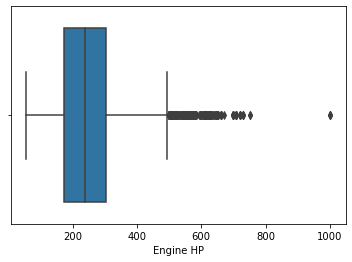

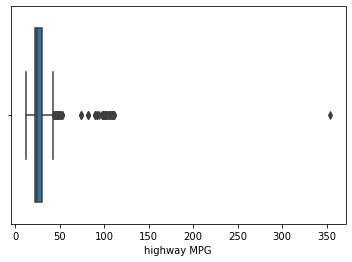

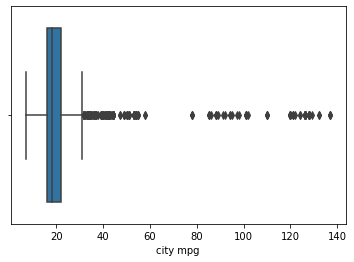

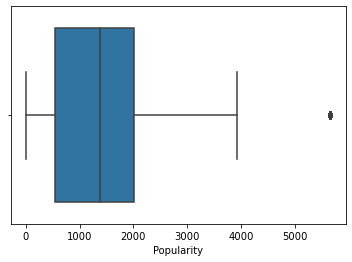

In [87]:
numerical_columns=['Engine HP','highway MPG','city mpg','Popularity']
for i in df[numerical_columns]:
    sns.boxplot(x=df[i])
    plt.show()

In [90]:
# Calculate the IQR for each column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
# Determine the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify the rows containing outliers
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)
# Remove the rows with outliers
df_no_outliers = df[~outliers]
# Print the number of removed outliers
print(f"Number of outliers removed: {outliers.sum()}")
# Display the dataframe without outliers
print(df_no_outliers.head())

Number of outliers removed: 1621
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

  Market Category Vehicle Size Vehicle Style  highway MPG  city mpg  \
0   Factory Tuner      Compact

In [91]:
df_no_outliers.shape

(9578, 16)

### LABEL ENCODING

In [95]:
# Label encoding of Categorical columns 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_no_outliers['Make']=le.fit_transform(df_no_outliers['Make'])
df_no_outliers['Model']=le.fit_transform(df_no_outliers['Model'])
df_no_outliers['Engine Fuel Type']=le.fit_transform(df_no_outliers['Engine Fuel Type'])
df_no_outliers['Transmission Type']=le.fit_transform(df_no_outliers['Transmission Type'])
df_no_outliers['Driven_Wheels']=le.fit_transform(df_no_outliers['Driven_Wheels'])
df_no_outliers['Market Category']=le.fit_transform(df_no_outliers['Market Category'])
df_no_outliers['Transmission Type']=le.fit_transform(df_no_outliers['Transmission Type'])
df_no_outliers['Vehicle Size']=le.fit_transform(df_no_outliers['Vehicle Size'])
df_no_outliers['Vehicle Style']=le.fit_transform(df_no_outliers['Vehicle Style'])

In [96]:
df_no_outliers.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,7,335.0,6.0,2,3,2.0,3,0,8,26,19,3916,46135
1,4,0,2011,7,300.0,6.0,2,3,2.0,8,0,6,28,19,3916,40650
2,4,0,2011,7,300.0,6.0,2,3,2.0,8,0,8,28,20,3916,36350
3,4,0,2011,7,230.0,6.0,2,3,2.0,8,0,8,28,18,3916,29450
4,4,0,2011,7,230.0,6.0,2,3,2.0,8,0,6,28,18,3916,34500
5,4,0,2012,7,230.0,6.0,2,3,2.0,8,0,8,28,18,3916,31200
6,4,0,2012,7,300.0,6.0,2,3,2.0,8,0,6,26,17,3916,44100
7,4,0,2012,7,300.0,6.0,2,3,2.0,8,0,8,28,20,3916,39300
8,4,0,2012,7,230.0,6.0,2,3,2.0,8,0,6,28,18,3916,36900
9,4,0,2013,7,230.0,6.0,2,3,2.0,8,0,6,27,18,3916,37200


### SCALING

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
scaled_df=df_no_outliers.copy()
columns_to_scale = ['Engine HP','highway MPG','city mpg','Popularity']
scaler = MinMaxScaler()
scaled_df[columns_to_scale] = scaler.fit_transform(df_no_outliers[columns_to_scale])
scaled_df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,7,0.629977,6.0,2,3,2.0,3,0,8,0.466667,0.478261,1.000000,46135
1,4,0,2011,7,0.548009,6.0,2,3,2.0,8,0,6,0.533333,0.478261,1.000000,40650
2,4,0,2011,7,0.548009,6.0,2,3,2.0,8,0,8,0.533333,0.521739,1.000000,36350
3,4,0,2011,7,0.384075,6.0,2,3,2.0,8,0,8,0.533333,0.434783,1.000000,29450
4,4,0,2011,7,0.384075,6.0,2,3,2.0,8,0,6,0.533333,0.434783,1.000000,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,748,2012,7,0.548009,6.0,1,0,4.0,0,2,2,0.366667,0.347826,0.051610,46120
11910,0,748,2012,7,0.548009,6.0,1,0,4.0,0,2,2,0.366667,0.347826,0.051610,56670
11911,0,748,2012,7,0.548009,6.0,1,0,4.0,0,2,2,0.366667,0.347826,0.051610,50620
11912,0,748,2013,6,0.548009,6.0,1,0,4.0,0,2,2,0.366667,0.347826,0.051610,50920


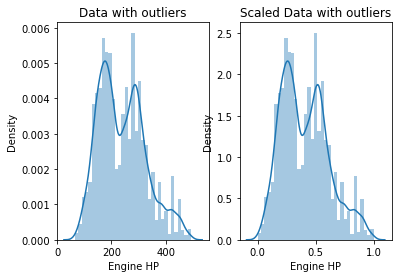

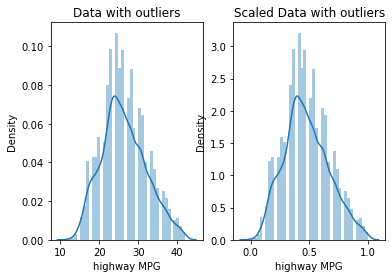

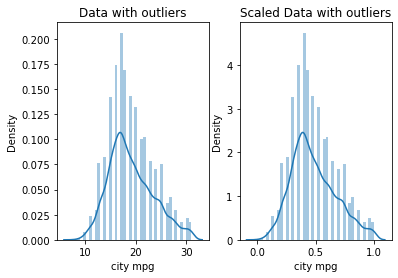

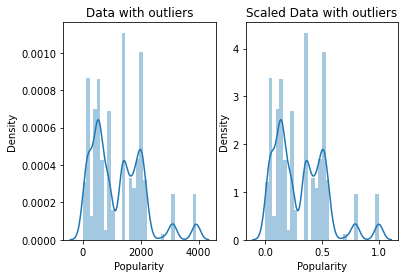

In [98]:
for i in df_no_outliers[['Engine HP','highway MPG','city mpg','Popularity']]:
    fig,ax=plt.subplots(1,2)
    sns.distplot(df_no_outliers[i],ax=ax[0])
    ax[0].set_title("Data with outliers")
    sns.distplot(scaled_df[i],ax=ax[1])
    ax[1].set_title("Scaled Data with outliers")

### NORMALIZATION

In [101]:
# I am not applying normalization since the distributions seems to be in a normal form

## FEATURE SELECTION

<AxesSubplot:>

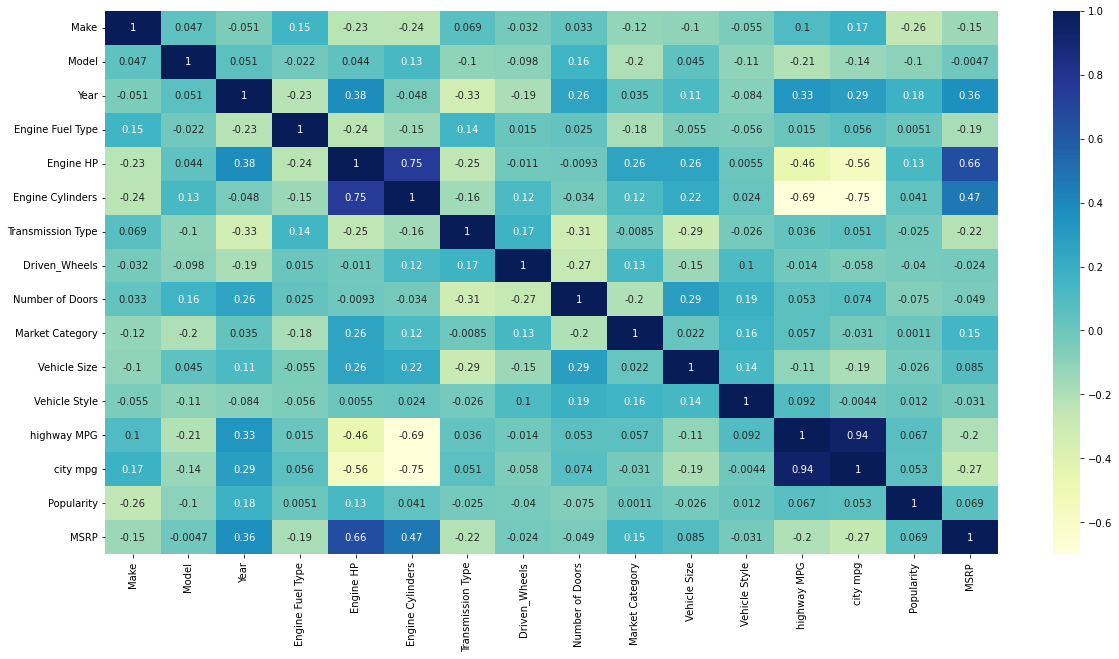

In [102]:
corrmatrix=df_no_outliers.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,vmax=1,vmin=-0.7,cmap='YlGnBu')

In [104]:
# from the correlation matrix we select Engine HP,Engine Cylinders,Highway MPG,city mpg for model building 

In [105]:
df1=scaled_df.copy()

In [107]:
df1=df1.drop(['Make','Model','Year','Number of Doors','Popularity','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style'],axis=1)

In [108]:
df1

,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
0,0.629977,6.0,0.466667,0.478261,46135
1,0.548009,6.0,0.533333,0.478261,40650
2,0.548009,6.0,0.533333,0.521739,36350
3,0.384075,6.0,0.533333,0.434783,29450
4,0.384075,6.0,0.533333,0.434783,34500
...,...,...,...,...,...
11909,0.548009,6.0,0.366667,0.347826,46120
11910,0.548009,6.0,0.366667,0.347826,56670
11911,0.548009,6.0,0.366667,0.347826,50620
11912,0.548009,6.0,0.366667,0.347826,50920


## MODEL BUILDING

### Splitting into Target and Features

In [109]:
x=df1.drop('MSRP',axis=1)
y=df1['MSRP']

### Test Train Split


In [110]:
# split the data for testing and training
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [116]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neural_network import MLPRegressor

In [117]:
!pip install catboost

In [119]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor


In [120]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'XG Boost Regression':XGBRegressor(),
    'XG Boost RF Regressor':XGBRFRegressor(),
    'Neural Network':MLPRegressor(),
    'CatBoost Regressor':CatBoostRegressor(verbose=0),
    'Random Forest':RandomForestRegressor(),
    
}

In [122]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Lasso Regression trained
XG Boost Regression trained
XG Boost RF Regressor trained
Neural Network trained
CatBoost Regressor trained
Random Forest trained


In [123]:
def get_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

In [125]:
for name,model in models.items():
    y_pred = model.predict(x_test)
    mse = get_mse(y_test,y_pred)
    print(name + ' MSE: {:.2f}'.format(mse))

Linear Regression MSE: 496163562.11
Ridge Regression MSE: 495980500.25
Lasso Regression MSE: 496158788.33
XG Boost Regression MSE: 121343851.52
XG Boost RF Regressor MSE: 157623074.35
Neural Network MSE: 772361065.38
CatBoost Regressor MSE: 115854770.46
Random Forest MSE: 104062523.94


In [126]:
from sklearn.metrics import r2_score

def get_r2(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

In [127]:
for name,model in models.items():
    y_pred = model.predict(x_test)
    r2 = get_r2(y_test,y_pred)
    print(name + ' R2: {:.2f}'.format(r2))

Linear Regression R2: 0.43
Ridge Regression R2: 0.43
Lasso Regression R2: 0.43
XG Boost Regression R2: 0.86
XG Boost RF Regressor R2: 0.82
Neural Network R2: 0.12
CatBoost Regressor R2: 0.87
Random Forest R2: 0.88


####From the above code Catboost regressor has high perfomance